In [2]:
a = 4
b = 5

    

   **
  ****
 ******
********


In [18]:
import replicate
from dotenv import load_dotenv
load_dotenv()

from datetime import datetime
import requests
import os 
from IPython.display import Image




In [19]:
def download(url : str, name : str, output_dir : str):
    
    r = requests.get(url, allow_redirects=True)
    if r.status_code != 200:
        raise Exception(f"Failed to download {url} to {name}")
    if r.ok:
        ext = url.split('.')[-1]
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        file_path = f"{output_dir}/{name}.{ext}"
        with open(file_path, 'wb') as f:
            f.write(r.content)
            print(f"> Downloaded {url} to {file_path}")
        
        return file_path
    else:
        return None

## stable-diffusion: generate images from text

https://replicate.delivery/pbxt/Zmv8u094CP4FEN7DswZz92JriBq86GVhzmo99ej7gxI0F0BJA/out-0.png


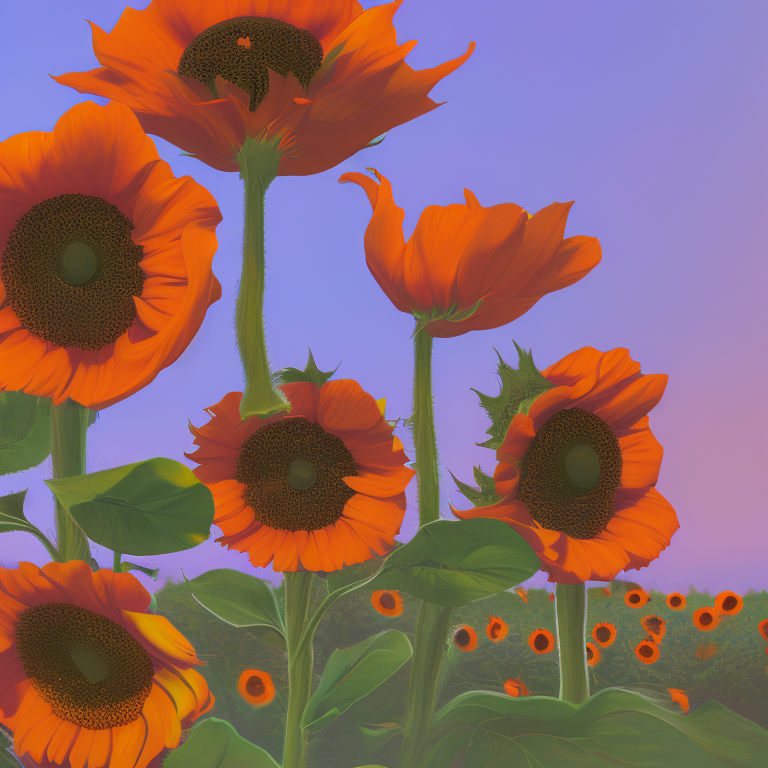

In [23]:
prompt = "Beautiful digital matte pastel paint sunflowers poppies chillwave greg rutkowski artstation, 4k"
replicate_output_image = replicate.run(
    "stability-ai/stable-diffusion:ac732df83cea7fff18b8472768c88ad041fa750ff7682a21affe81863cbe77e4",
    input={
        "width": 768,
        "height": 768,
        "prompt": prompt,
        "scheduler": "K_EULER",
        "num_outputs": 1,
        "guidance_scale": 7.5,
        "num_inference_steps": 50,
        "prompt_strenght" : 0.8
    }
)
# if list and not empty
replicate_output_image = replicate_output_image[0] if isinstance(replicate_output_image, list) and len(replicate_output_image) > 0 else replicate_output_image

print(replicate_output_image)
Image(replicate_output_image)

In [24]:
now_str = datetime.now().strftime("%Y%m%d %H%M")
print(now_str)
saved_path = download(replicate_output_image, name=f"{prompt} {now_str}", output_dir="outputs/ai_generated_images")

20231219 0008
> Downloaded https://replicate.delivery/pbxt/Zmv8u094CP4FEN7DswZz92JriBq86GVhzmo99ej7gxI0F0BJA/out-0.png to outputs/ai_generated_images/Beautiful digital matte pastel paint sunflowers poppies chillwave greg rutkowski artstation, 4k 20231219 0008.png


## stable-video-Diffusion : generate video from image

In [25]:
replicate_output_video = replicate.run(
  "stability-ai/stable-video-diffusion:3f0457e4619daac51203dedb472816fd4af51f3149fa7a9e0b5ffcf1b8172438",
  input={
    "cond_aug": 0.02,
    "decoding_t": 7,
    "input_image": replicate_output_image,
    "video_length": "25_frames_with_svd_xt",
    "sizing_strategy": "maintain_aspect_ratio",
    "motion_bucket_id": 127,
    "frames_per_second": 6
  }
)
print(replicate_output_video)
now_str = datetime.now().strftime("%Y%m%d %H%M")
saved_path = download(replicate_output_video, name=f"video {prompt} {now_str}", output_dir="outputs/ai_generated_images")

https://replicate.delivery/pbxt/LmE1VjrfCS0heEB4vQoBQScVqEqiwve3r5EJzdJ38iJhbQHkA/000192.mp4
> Downloaded https://replicate.delivery/pbxt/LmE1VjrfCS0heEB4vQoBQScVqEqiwve3r5EJzdJ38iJhbQHkA/000192.mp4 to outputs/ai_generated_images/video Beautiful digital matte pastel paint sunflowers poppies chillwave greg rutkowski artstation, 4k 20231219 0010.mp4


In [36]:
# display link to video
from IPython.display import HTML
cwd = os.getcwd().replace("\\","/")
video_full_path = f"{cwd}/{saved_path}"
print(cwd,saved_path)
HTML(f'<video src="{video_full_path}" controls></video>')

N:/My Drive/KESKIA Drive Mlamali/Mantes-Plus-Propre outputs/ai_generated_images/video Beautiful digital matte pastel paint sunflowers poppies chillwave greg rutkowski artstation, 4k 20231219 0010.mp4
